### Import Libraries

In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

### Import Data

In [3]:
df = pd.read_csv('dataset_heart.csv')
df.head()

,age,sex,chest pain type,resting blood pressure,serum cholestoral,fasting blood sugar,resting electrocardiographic results,max heart rate,exercise induced angina,oldpeak,ST segment,major vessels,thal,heart disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,2
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,1
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,2
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,1
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,1


### Preprocesssing---Data Summary

In [7]:
# df.describe()
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,270.0,54.433333,9.109067,29.0,48.0,55.0,61.0,77.0
sex,270.0,0.677778,0.468195,0.0,0.0,1.0,1.0,1.0
chest pain type,270.0,3.174074,0.950090,1.0,3.0,3.0,4.0,4.0
resting blood pressure,270.0,131.344444,17.861608,94.0,120.0,130.0,140.0,200.0
serum cholestoral,270.0,249.659259,51.686237,126.0,213.0,245.0,280.0,564.0
fasting blood sugar,270.0,0.148148,0.355906,0.0,0.0,0.0,0.0,1.0
resting electrocardiographic results,270.0,1.022222,0.997891,0.0,0.0,2.0,2.0,2.0
max heart rate,270.0,149.677778,23.165717,71.0,133.0,153.5,166.0,202.0
exercise induced angina,270.0,0.329630,0.470952,0.0,0.0,0.0,1.0,1.0
oldpeak,270.0,1.050000,1.145210,0.0,0.0,0.8,1.6,6.2


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   age                                   270 non-null    int64  
 1   sex                                   270 non-null    int64  
 2   chest pain type                       270 non-null    int64  
 3   resting blood pressure                270 non-null    int64  
 4   serum cholestoral                     270 non-null    int64  
 5   fasting blood sugar                   270 non-null    int64  
 6   resting electrocardiographic results  270 non-null    int64  
 7   max heart rate                        270 non-null    int64  
 8   exercise induced angina               270 non-null    int64  
 9   oldpeak                               270 non-null    float64
 10  ST segment                            270 non-null    int64  
 11  major vessels      

In [20]:
df.shape

(270, 14)

In [9]:
# Missing value
df.isnull().sum()

age                                     0
sex                                     0
chest pain type                         0
resting blood pressure                  0
serum cholestoral                       0
fasting blood sugar                     0
resting electrocardiographic results    0
max heart rate                          0
exercise induced angina                 0
oldpeak                                 0
ST segment                              0
major vessels                           0
thal                                    0
heart disease                           0
dtype: int64

### Outlier Detection

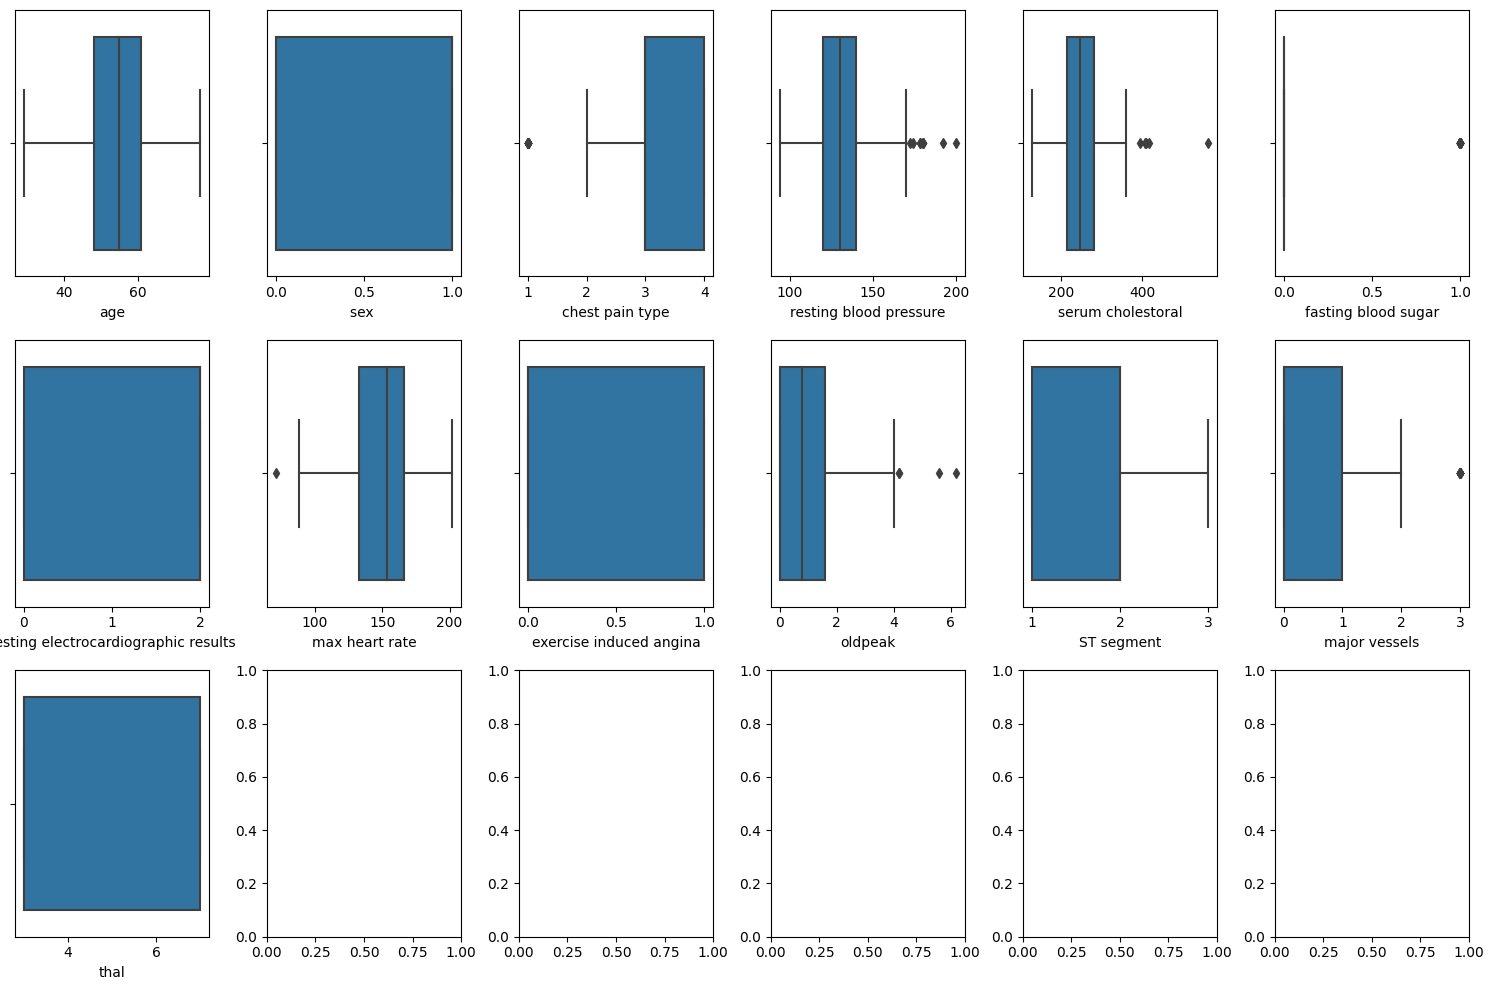

In [18]:
def boxplots(df):
    cols = df.columns[:-1]
    n = (len(cols)-1)//6+1
    m = min(len(cols),6)
    fig, axes = plt.subplots(nrows=n, ncols=m, figsize=(15,10))
    for ids, col in enumerate(cols):
        i = ids // m
        j = ids % m
        sns.boxplot(data = df, x = col, ax = axes[i][j])
    plt.tight_layout()
    plt.show()
boxplots(df)

### Outelier Removal

In [23]:
def outlier_removal(df,i):
    percnt = np.percentile(df[i], [0,25,50,75,100])
    iqr = percnt[3]- percnt[1]
    min_ = percnt[1]-1.5*iqr
    max_ = percnt[3]+1.5*iqr
    df.loc[df[i] > max_, i] = max_
    df.loc[df[i] < min_, i] = min_
    return(df)

In [24]:
for i in df.columns[:-1]:
    df = outlier_removal(df,i)

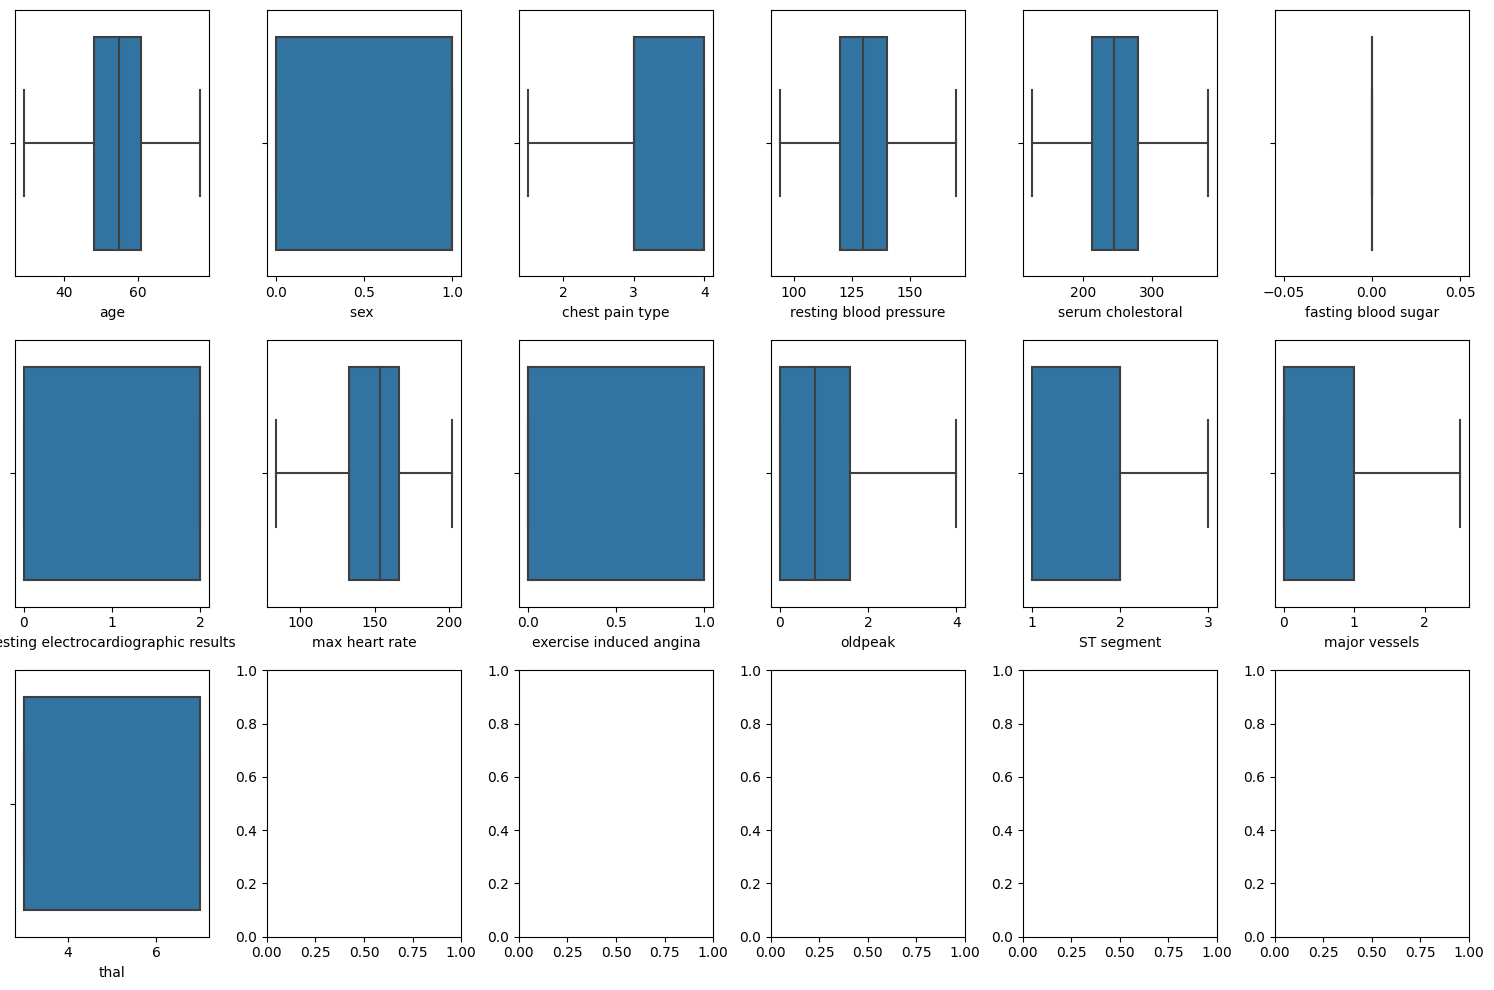

In [25]:
boxplots(df)

### Logistic Regression

In [36]:
X = df.drop('heart disease', axis = 1)
y = df['heart disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

LogisticRegression()

In [30]:
y_pred = log_reg.predict(X_test)

### Log Regression Model Accuracy

In [31]:
model_accu_logr = accuracy_score(y_test, y_pred)
print('Model accuracy score by logistic regression is:', model_accu_logr)

Model accuracy score by logistic regression is: 0.9117647058823529


In [46]:
conf_mat_lr = confusion_matrix(y_test, y_pred)
print('Confusion matrix for Logistic Regression:\n', conf_mat_lr)

Confusion matrix for Logistic Regression:
 [[39  1]
 [ 5 23]]


In [37]:
# Model reliability score
score_logr = cross_val_score(log_reg, X_test, y_test, cv=10)
print('Model reliability score by logistic regression is:', score_logr.mean())

Model reliability score by logistic regression is: 0.85


### Random Forest

In [50]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred_RF = model.predict(X_test)
from sklearn.ensemble import RandomForestClassifier

### Evaluation report

In [51]:
accuracy_rf = accuracy_score(y_test, y_pred_RF)
print('Accuracy by Random Forest is:', accuracy_rf)

Accuracy by Random Forest is: 0.8382352941176471


In [52]:
conf_mat_rf = confusion_matrix(y_test, y_pred_RF)
print('Confusion matrix for Random Forest:\n', conf_mat_rf)

Confusion matrix for Random Forest:
 [[37  3]
 [ 8 20]]


In [53]:
Class_rept_rf = classification_report(y_test, y_pred_RF)
print('Classification report for Random Forest is:\n', Class_rept_rf)

Classification report for Random Forest is:
               precision    recall  f1-score   support

           1       0.82      0.93      0.87        40
           2       0.87      0.71      0.78        28

    accuracy                           0.84        68
   macro avg       0.85      0.82      0.83        68
weighted avg       0.84      0.84      0.84        68

